# HW03: due October th 

The goal of this homework is to **predict** the value of houses in California starting from house and neighborhood caracteristics. 

Differently from last week's homework, we are not interested in investigating the causal effect of some features on house values, but the main purpose is to obtain good predictions of the values, so to train the best model to minimize the loss function. 

In [8]:
# Load Data
from sklearn.datasets import fetch_california_housing
import pandas as pd
data = fetch_california_housing(as_frame=True)
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)

20640 8


# Summary Statistics

<AxesSubplot: xlabel='MedHouseVal', ylabel='Count'>

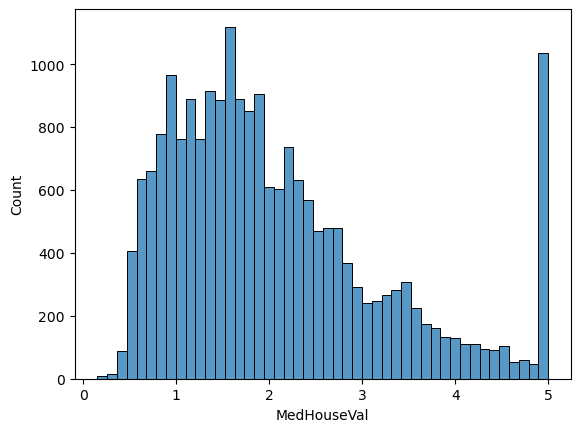

In [10]:
import seaborn as sns
# make a histogram of the label variable
sns.histplot(x=y_full)

/Users/sverrirarnorsson/miniconda3/envs/brj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/sverrirarnorsson/miniconda3/envs/brj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/sverrirarnorsson/miniconda3/envs/brj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/sverrirarnorsson/miniconda3/envs/brj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


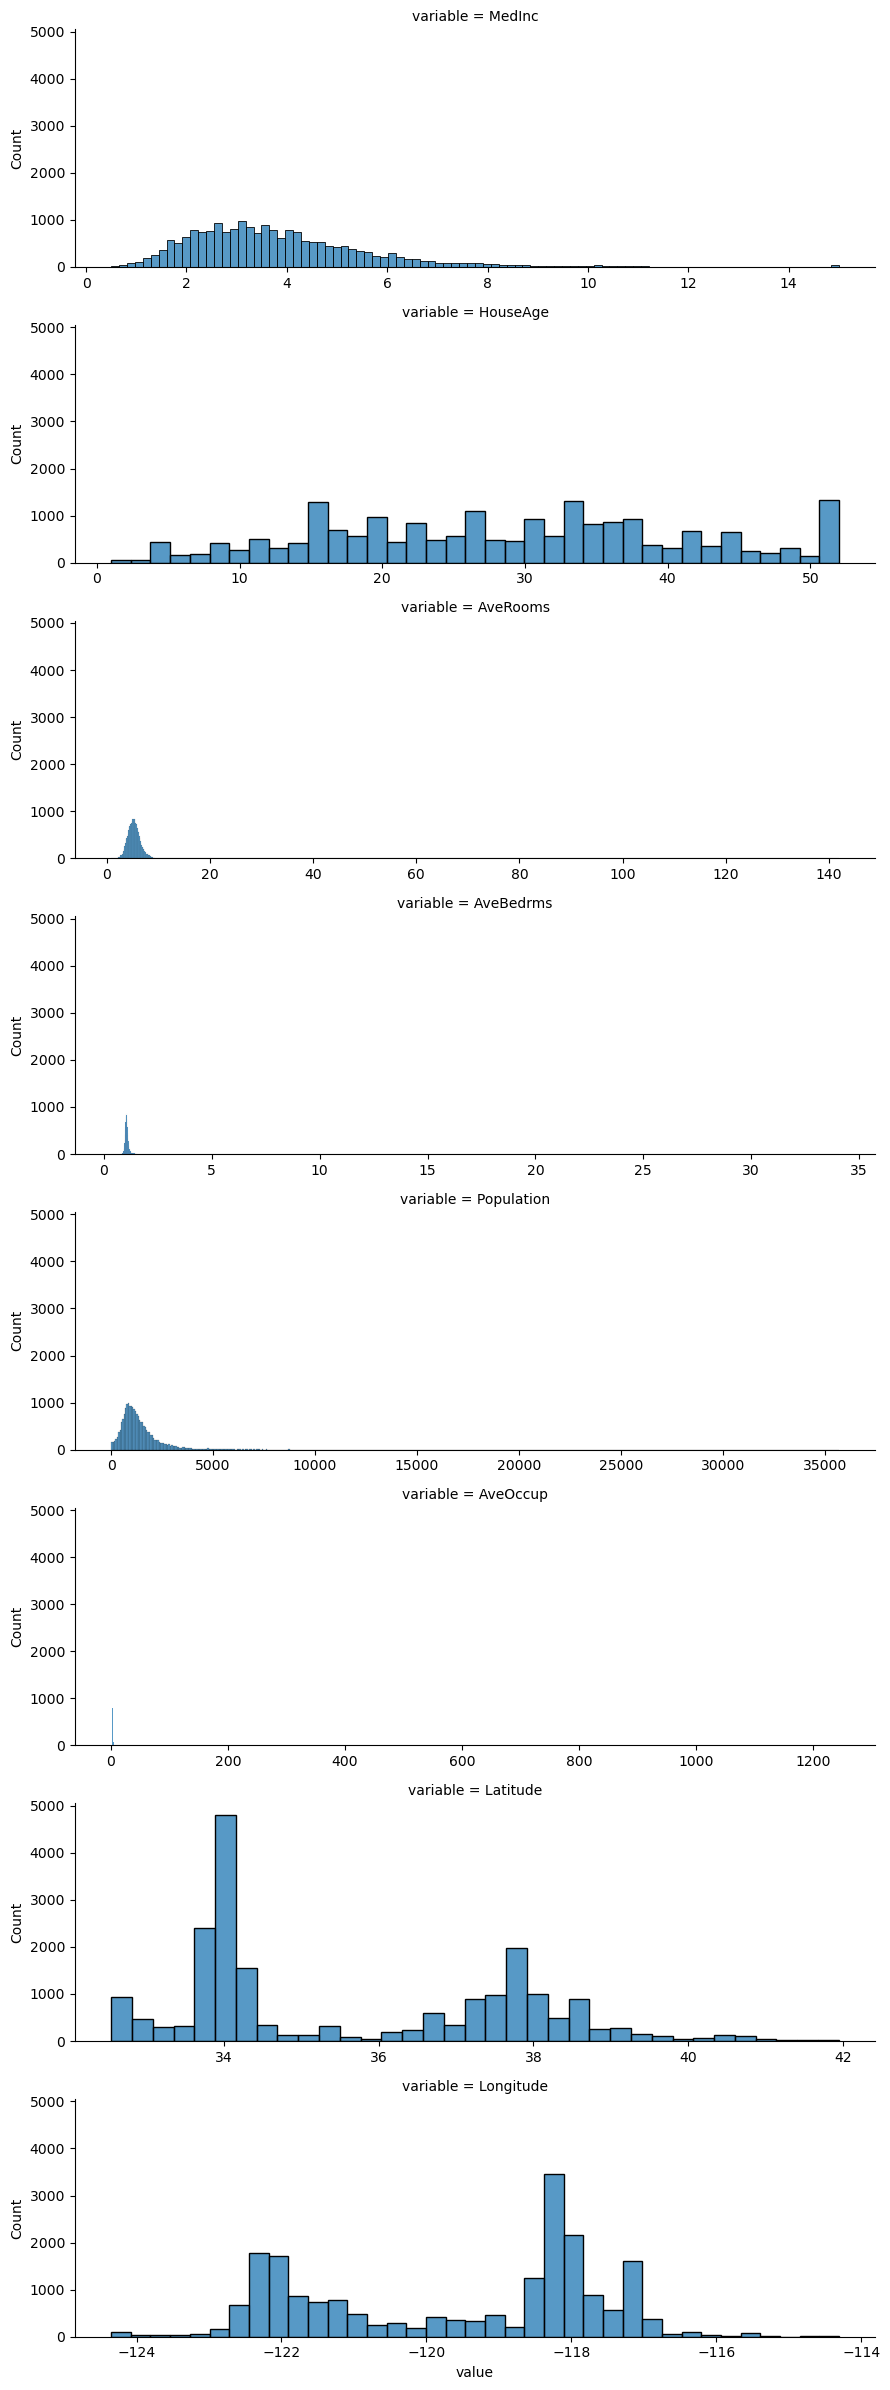

In [11]:
# make histograms of all predictors
predictors = pd.melt(data.data)
grid = sns.FacetGrid(predictors, row="variable", sharex=False, aspect=3)
grid.map(sns.histplot, "value")

/Users/sverrirarnorsson/miniconda3/envs/brj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/sverrirarnorsson/miniconda3/envs/brj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/sverrirarnorsson/miniconda3/envs/brj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/sverrirarnorsson/miniconda3/envs/brj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


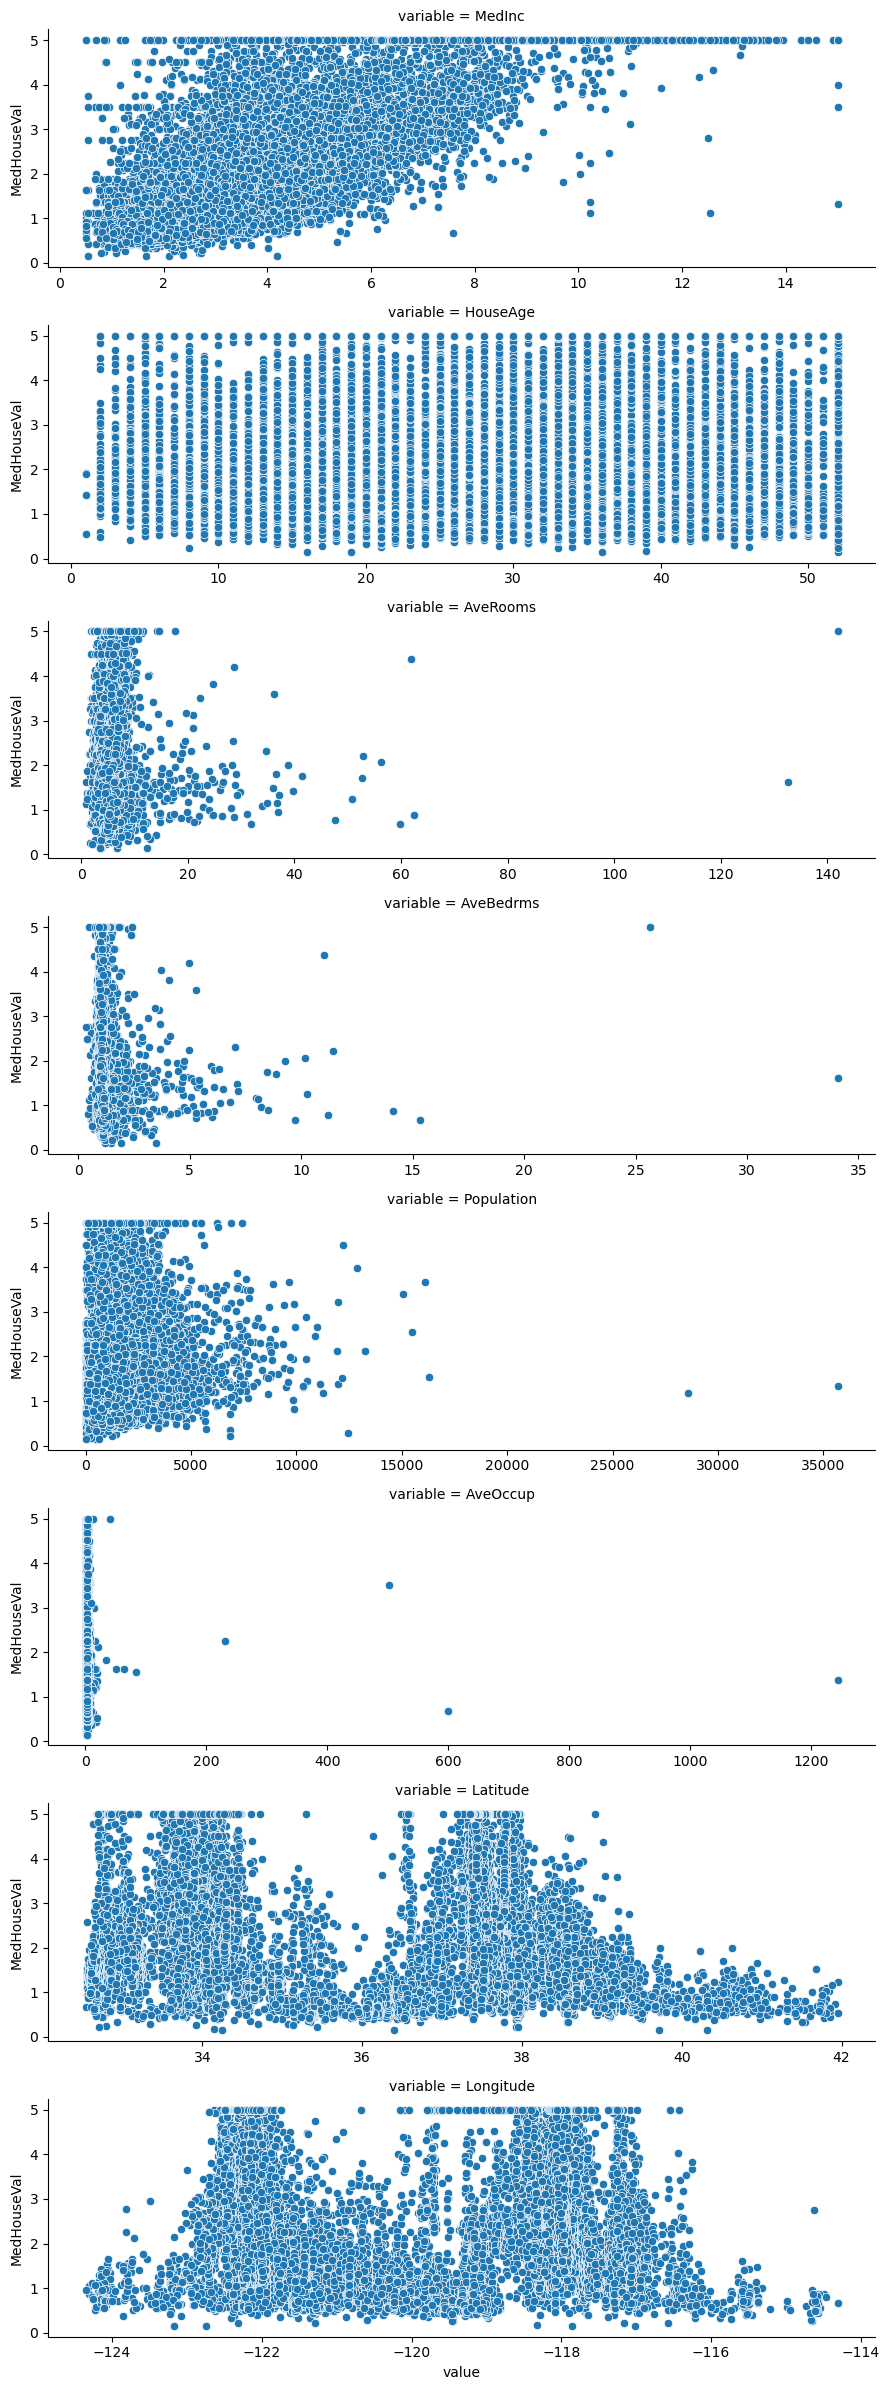

In [12]:
from seaborn import scatterplot
# make scatterplots of all predictors with the label
#TODO
predictors2 = data.data.join(data.target)
predictors2 = pd.melt(predictors2, id_vars="MedHouseVal")
grid = sns.FacetGrid(predictors2, row="variable", sharex=False, aspect=3)
grid.map(sns.scatterplot, "value", "MedHouseVal")

# Train/Test Split

In [33]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=0)

# Pre-Processing

In [34]:
from sklearn.preprocessing import StandardScaler
# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

## Fractional Ridge Regression
https://arxiv.org/abs/2005.03220

https://nrdg.github.io/fracridge/

In [36]:
from fracridge import FracRidgeRegressorCV
# import fracridge
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# train fractional ridge on raw predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
frr1 = FracRidgeRegressorCV()
frr1.fit(X_train, y_train)
print("Fraction penalty", frr1.best_frac_)
print("MSE", mean_squared_error(y_test, frr1.predict(X_test)))
print("R2", r2_score(y_test, frr1.predict(X_test)))

Fraction penalty 0.9
MSE 0.6141843033277103
R2 0.5289834776974172


In [55]:
# train fractional ridge on stanardized predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
frr2 = FracRidgeRegressorCV()
frr2.fit(X_train_scaled, y_train)
print("Fraction penalty", frr2.best_frac_)
print("MSE", mean_squared_error(y_test, frr2.predict(X_test_scaled)))
print("R2", r2_score(y_test, frr2.predict(X_test_scaled)))

Fraction penalty 1.0
MSE 4.781166887780188
R2 -2.6666658327620647


In [56]:
# train fractional ridge on standardized predictors including quadratics and interactions
# report the chosen fraction penalty
# report MSE and r-squared in test set 
frr3 = FracRidgeRegressorCV()
frr3.fit(X_train_poly, y_train)
print("Fraction penalty", frr3.best_frac_)
print("MSE", mean_squared_error(y_test, frr3.predict(X_test_poly)))
print("R2", r2_score(y_test, frr3.predict(X_test_poly)))

Fraction penalty 0.5
MSE 3.5214123580686993
R2 -1.7005629963256386


In [48]:
from seaborn import regplot

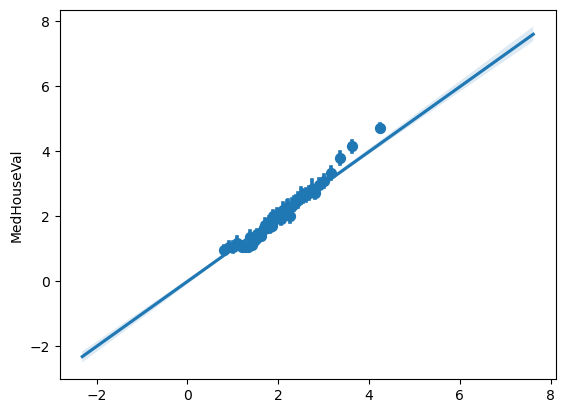

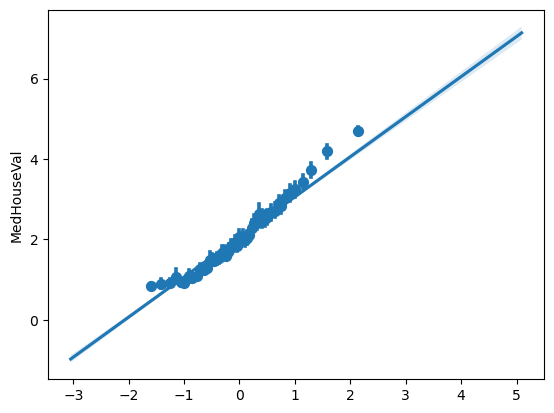

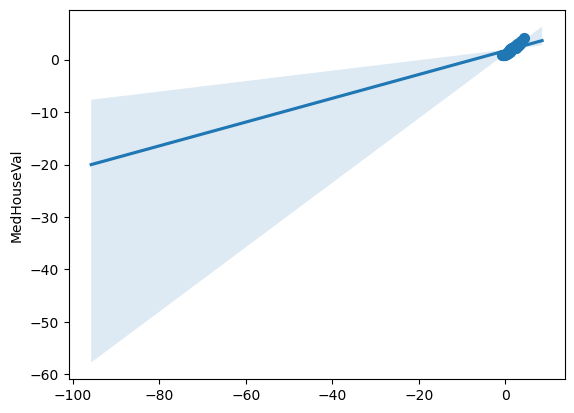

In [53]:
# report a binned regplot of the true outcome versus predictions in the test set
import matplotlib.pyplot as plt
sns.regplot(x=frr1.predict(X_test), y=y_test, x_bins=50)
plt.show()
sns.regplot(x=frr2.predict(X_test_scaled), y=y_test, x_bins=50)
plt.show()
sns.regplot(x=frr3.predict(X_test_poly), y=y_test, x_bins=50)
plt.show()

**How do the results change when using different predictors? Which one do you think is the best model for this task? Explain.**

Based on the metrics, the regular one looks like the best fit. It's the only one which has a sensible R2 score, and also has the lowest MSE (although we can't compare the scale). However in general, the results change quite drastically, but that seems to be because of faults in the standardization.